In [1]:
from sklearn.datasets import load_diabetes

In [2]:
from sklearn.model_selection import train_test_split
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=1204)

In [3]:
from sklearn.linear_model import Lasso

In [4]:
lasso = Lasso().fit(X_train,y_train)
lasso.score(X_train,y_train)

0.3448854471156567

In [5]:
lasso.score(X_test,y_test)

0.3533273173854683

In [8]:
import numpy as np
np.sum(lasso.coef_ !=0)

3

In [9]:
lasso.coef_

array([  0.        ,  -0.        , 369.2165617 ,  14.89216429,
         0.        ,   0.        ,  -0.        ,   0.        ,
       271.87172588,   0.        ])

In [10]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Ans 3:
            
    Training R^2: 0.3448854471156567
    Test R^2: 0.3533273173854683
            
    This model only uses 3 features namely:
        1. 'bmi'
        2. 'bp'
        3. 's5'

In [18]:
X = np.genfromtxt('C:/Users/bhara/OneDrive/Desktop/diabetes.data', usecols=np.arange(10))

In [19]:
X[:3]

array([[     nan,      nan,      nan,      nan,      nan,      nan,
             nan,      nan,      nan,      nan],
       [ 59.    ,   2.    ,  32.1   , 101.    , 157.    ,  93.2   ,
         38.    ,   4.    ,   4.8598,  87.    ],
       [ 48.    ,   1.    ,  21.6   ,  87.    , 183.    , 103.2   ,
         70.    ,   3.    ,   3.8918,  69.    ]])

In [20]:
Y = np.genfromtxt('C:/Users/bhara/OneDrive/Desktop/diabetes.data', usecols=10, dtype = 'int')

In [14]:
X=X[1:]


In [21]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X[1:],Y[1:], random_state=1204)

In [22]:
lasso1 = Lasso().fit(X1_train,y1_train)
lasso1.score(X1_train,y1_train)

0.5036786201378218

In [23]:
lasso1.score(X1_test,y1_test)

0.51874527145387

In [24]:
np.sum(lasso1.coef_!=0)

9

In [32]:
lasso1.coef_

array([-1.79287920e-01, -2.36126640e+01,  6.03675644e+00,  1.10626582e+00,
       -6.99830895e-02, -1.86632812e-02, -8.48070776e-01,  0.00000000e+00,
        3.74256541e+01,  2.98805332e-01])

Ans 6:
            
    Training R^2: 0.5036786201378218
    Test R^2: 0.51874527145387
            
    This model only uses 9 features namely:
         1. 'age'
         2. 'sex' 
         3. 'bmi' 
         4. 'bp'
         5. 's1'
         6. 's2'
         7. 's3'
         8. 's4'
         9. 's5'
            
    The scores have significantly changed and even the number of features utilised have increased after loading the dataset.

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
scaler.fit(X1_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [35]:
X1_train_scaled = scaler.transform(X1_train)

In [36]:
X1_test_scaled = scaler.transform(X1_test)

In [37]:
print(X1_test_scaled.shape)

(111, 10)


In [232]:
lasso1 = Lasso(alpha=20, max_iter=100000).fit(X1_train_scaled,y1_train)
lasso1.score(X1_train_scaled,y1_train)
np.sum(lasso1.coef_!=0)

3

In [233]:
lasso1.score(X1_train_scaled,y1_train)

0.35759830569329876

In [234]:
lasso1.score(X1_test_scaled,y1_test)

0.36743016694757147

In [235]:
lasso1.coef_

array([ 0.        , -0.        , 18.18847875,  0.73122707,  0.        ,
        0.        , -0.        ,  0.        , 13.67358653,  0.        ])

Ans 8:
     
    In this question initially if no alpha values are provided the Lasso score provides values similar to Ques 6 which is:
     
         Scaled Training R^2: 0.5041554251851361  Ques 6 Training R^2: 0.5036786201378218
         Scaled Test R^2: 0.518632529431523       Ques 6 Test R^2: 0.51874527145387
         Scaled model uses 8 features namely:     Ques 6 model uses 9 features namely:
         1. 'age'                                 1. 'age' 
         2. 'sex'                                 2. 'sex'       
         3. 'bmi'                                 3. 'bmi' 
         4. 'bp'                                  4. 'bp'
         5. 's1'                                  5. 's1'
         6. 's3'                                  6. 's2'
         7. 's5'                                  7. 's3'
         8. 's6'                                  8. 's4'
                                                  9. 's5'
                                                  
    But after adding alpha parameter to 20(very high, as mentioned in the code above), we get similar results to Ques 3. 
    Which explains, why even after scaling the values too, the scores remain near the unscaled values since alpha values are set to default which is '1.0'. Thereby the expectation is not confirmed untill the alpha parameter is added to the Lasso. 
        
        Scaled Training R^2(alpha=20): 0.35759830569329876  Ques 3 Training R^2: 0.3448854471156567
        Scaled Test R^2(alpha=20): 0.36743016694757147      Ques 3 Test R^2: 0.3533273173854683
        Scaled model uses 3 features namely:               Ques 3 model uses 9 features namely:
         1. 'bmi'                                           1. 'bmi' 
         2. 'bp'                                            2. 'bp'       
         3. 's5'                                            3. 's5' 


In [193]:
a = [ 0.01,0.456,1,2,3,4,10,12,13,14,15]   

In [194]:
b= []
c=[]
for i in a:
    lassofull = Lasso(alpha=i,max_iter=100000).fit(X1_train_scaled,y1_train)
    b.append(lassofull.score(X1_test_scaled,y1_test))
    c.append(np.sum(lassofull.coef_!=0))

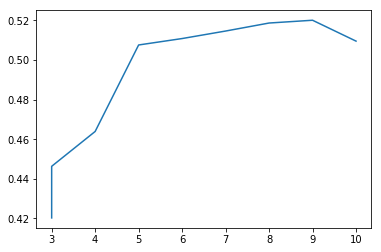

In [196]:
plt.plot(c,b)

Ans 9:
    
    The point with the highest value of score and maximum number of features would mean a high accuracy, good enough variance/bias and therefore would be preferable, so in this case the point with "9 features" and score of around "0.52" would be the most suitable.

In [198]:
from sklearn.linear_model import LassoCV

In [199]:
reg = LassoCV(cv=5,max_iter=100000).fit(X1_train_scaled,y1_train)

In [200]:
reg.alpha_

0.044938033989740084

In [236]:
lassofinal = Lasso(alpha=reg.alpha_,max_iter=100000).fit(X1_train_scaled,y1_train)
lassofinal.score(X1_train_scaled,y1_train)

0.5119383276369696

In [237]:
lassofinal.score(X1_test_scaled,y1_test)

0.5115462078980595

In [218]:
np.sum(lassofinal.coef_!=0)

10

Ans 10:
    
    The resulting R^2 score after getting the alpha parameter(0.044938033989740084) from cross validation are:
        Training R^2: 0.5119383276369696
            Test R^2: 0.5115462078980595
            
    After the applying the alpha parameter from cross validation we get all the "10" features utilised, which actually presents an almost ideal presentation with high R^2 and all parameter utilisation.